### Objectives

The primary aim of this notebook is to thoroughly analyze the dataset’s variables and their interconnections. This analysis will inform the selection and development of machine learning models that align with overarching project goals to enrich understanding of our portfolio of projects and identify patterns in the types of projects driving revenue. The insights gained will not only influence the choice of models but also identify necessary preprocessing steps to prepare the dataset for machine learning applications.

Additionally, this exploratory analysis serves a secondary purpose: to validate business hypotheses and extract initial findings that could provide immediate value.

### Insights of Interest
*In sections rn but turn into integrated presentation of most important findings*

Univariate
*Insert*

### Package  & Data Imports + Path Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt

In [58]:
#enabling importing of modules from utils directory

# construct path to utils directory
path_to_utils = os.path.abspath(os.path.join(os.path.dirname('__file__'), 'utils')) 

# avoid adding multiple times
if path_to_utils not in sys.path:
    sys.path.append(path_to_utils)

In [73]:
df = pd.read_excel("./data/cleaned_data.xlsx")

In [88]:
df.head(3)

,state,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,usd_pledged,category,spotlight,blurb_len,blurb_len_clean,deadline_weekday,state_changed_at_weekday,created_at_weekday,launched_at_weekday,deadline_month,deadline_day,deadline_yr,deadline_hr,state_changed_at_month,state_changed_at_day,state_changed_at_yr,state_changed_at_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,usd_goal,name2,name_len2,name_len_clean_2
0,failed,False,GB,GBP,2016-03-19 09:31:29,2016-03-19 09:31:32,2015-12-18 03:17:13,2016-02-18 09:31:29,False,66,8484.125686,Gadgets,False,18.0,14.0,Saturday,Saturday,Friday,Thursday,3,19,2016,9,3,19,2016,9,12,18,2015,3,2,18,2016,9,62,30,30,21450,MAGIC PIXEL - Bluetooth full color LED display,8,8
1,successful,False,DE,EUR,2016-04-03 08:05:09,2016-04-03 08:05:10,2016-02-08 09:27:33,2016-02-18 08:05:09,False,131,18454.471487,Uncategorized,True,23.0,15.0,Sunday,Sunday,Monday,Thursday,4,3,2016,8,4,3,2016,8,2,8,2016,9,2,18,2016,8,9,45,45,10034,SmartPi - Turn your Raspberry Pi into a SmartM...,9,6
2,canceled,False,US,USD,2016-03-29 08:01:08,2016-03-28 09:46:41,2016-01-31 05:21:52,2016-02-18 08:01:08,False,632,43234.000000,Gadgets,False,22.0,12.0,Tuesday,Monday,Sunday,Thursday,3,29,2016,8,3,28,2016,9,1,31,2016,5,2,18,2016,8,18,40,39,60000,PlantSitter - The World's Smartest Plant Monit...,8,7


### Preparation

Earlier QA preprocessing had minimal column removal so that the same functions could be used when preparing the dataset for other purposes in the future. Knowing our purposes in this case, certain columns can already be deemed unnecessary. ID columns, non-US currency columns, and previous versions of the `name` columns are removed in these steps.

In [75]:
to_drop = ['id', 'goal', 'pledged', 'static_usd_rate', 'name', 'name_len', 'name_len_clean' ]
for col in to_drop:
    if col in df.columns:
        df.drop(columns = [col], inplace= True)

In [82]:
df.columns

Index(['state', 'disable_communication', 'country', 'currency', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'staff_pick',
       'backers_count', 'usd_pledged', 'category', 'spotlight', 'blurb_len',
       'blurb_len_clean', 'deadline_weekday', 'state_changed_at_weekday',
       'created_at_weekday', 'launched_at_weekday', 'deadline_month',
       'deadline_day', 'deadline_yr', 'deadline_hr', 'state_changed_at_month',
       'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr',
       'created_at_month', 'created_at_day', 'created_at_yr', 'created_at_hr',
       'launched_at_month', 'launched_at_day', 'launched_at_yr',
       'launched_at_hr', 'create_to_launch_days', 'launch_to_deadline_days',
       'launch_to_state_change_days', 'usd_goal', 'name2', 'name_len2',
       'name_len_clean_2'],
      dtype='object')

Preparing lists of categorical, numerical, datetime, and timestamp columns so that they can be analyzed appropriately

In [87]:
datetimecols = ['deadline_month','deadline_day','deadline_yr','deadline_hr','state_changed_at_month','state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr','created_at_month','created_at_day','created_at_yr','created_at_hr',
                'launched_at_month', 'launched_at_day', 'launched_at_yr','launched_at_hr', 'created_at_weekday', 'launched_at_weekday', 'deadline_weekday', 'state_changed_at_weekday'] 

timestampcols = ['deadline', 'state_changed_at', 'created_at', 'launched_at']

catcols = df.select_dtypes(include=['object', 'bool']).columns.to_list()

for col in datetimecols:
    if col in catcols:
        catcols.remove(col)

numcols = [col for col in df.columns if col not in catcols + datetimecols + timestampcols]

print("Numerical Variables: ", numcols)
print("Categorical Variables: ", catcols)


Numerical Variables:  ['backers_count', 'usd_pledged', 'blurb_len', 'blurb_len_clean', 'create_to_launch_days', 'launch_to_deadline_days', 'launch_to_state_change_days', 'usd_goal', 'name_len2', 'name_len_clean_2']
Categorical Variables:  ['state', 'disable_communication', 'country', 'currency', 'staff_pick', 'category', 'spotlight', 'name2']


### Univariate Analysis

#### Descriptive Statistics on Numerical Variables

In [84]:
pd.set_option('display.max_columns', None)
df[numcols].describe().round(2)

,backers_count,usd_pledged,blurb_len,blurb_len_clean,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,usd_goal,name_len2,name_len_clean_2
count,15474.00,15474.00,15470.00,15470.00,15474.00,15474.00,15474.00,1.547400e+04,15474.00,15474.00
mean,181.17,19975.49,18.99,13.03,46.91,34.68,32.02,9.474142e+04,5.80,4.73
std,1287.83,114439.55,4.64,3.26,101.77,11.98,13.67,1.462852e+06,2.84,2.25
min,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.000000e+00,1.00,0.00
25%,2.00,24.86,17.00,11.00,3.00,30.00,29.00,4.000000e+03,3.00,3.00
50%,12.00,676.84,20.00,13.00,13.00,30.00,30.00,1.250000e+04,6.00,5.00
75%,63.00,5896.88,22.00,15.00,43.00,40.00,35.00,4.482050e+04,8.00,6.00
max,105857.00,6225354.98,35.00,30.00,1528.00,91.00,91.00,1.000000e+08,16.00,14.00


**Observations**
* Observing zero minimums for backers count and funds raised (`usd_pledged`) seems logical as projects could be canceled, suspended, or simply very unsuccesful. The dataset does not include projects which are in an actively fundraising state, so this explanation for zero minimums would not apply. It may be beneficial to exclude suspended projects from the clustering analysis as identifying patterns here is not as relevant to the analytical objective.
* For funding related variables (`usd_goal`, `usd_pledged`, and `backers_count`) and project timeline variables (`create_to_launch_days`, `launch_to_deadline_days`, and `launch_to_state_change_days`), the interquartile ranges (IQRs) are fairly compact with notable positive extremes on the positive. Investigating the distribution and relationship to other variables will be important for determining whether these outliers represent a meaningful segment of projects or are anomolies to exclude.


**Data Distributions**

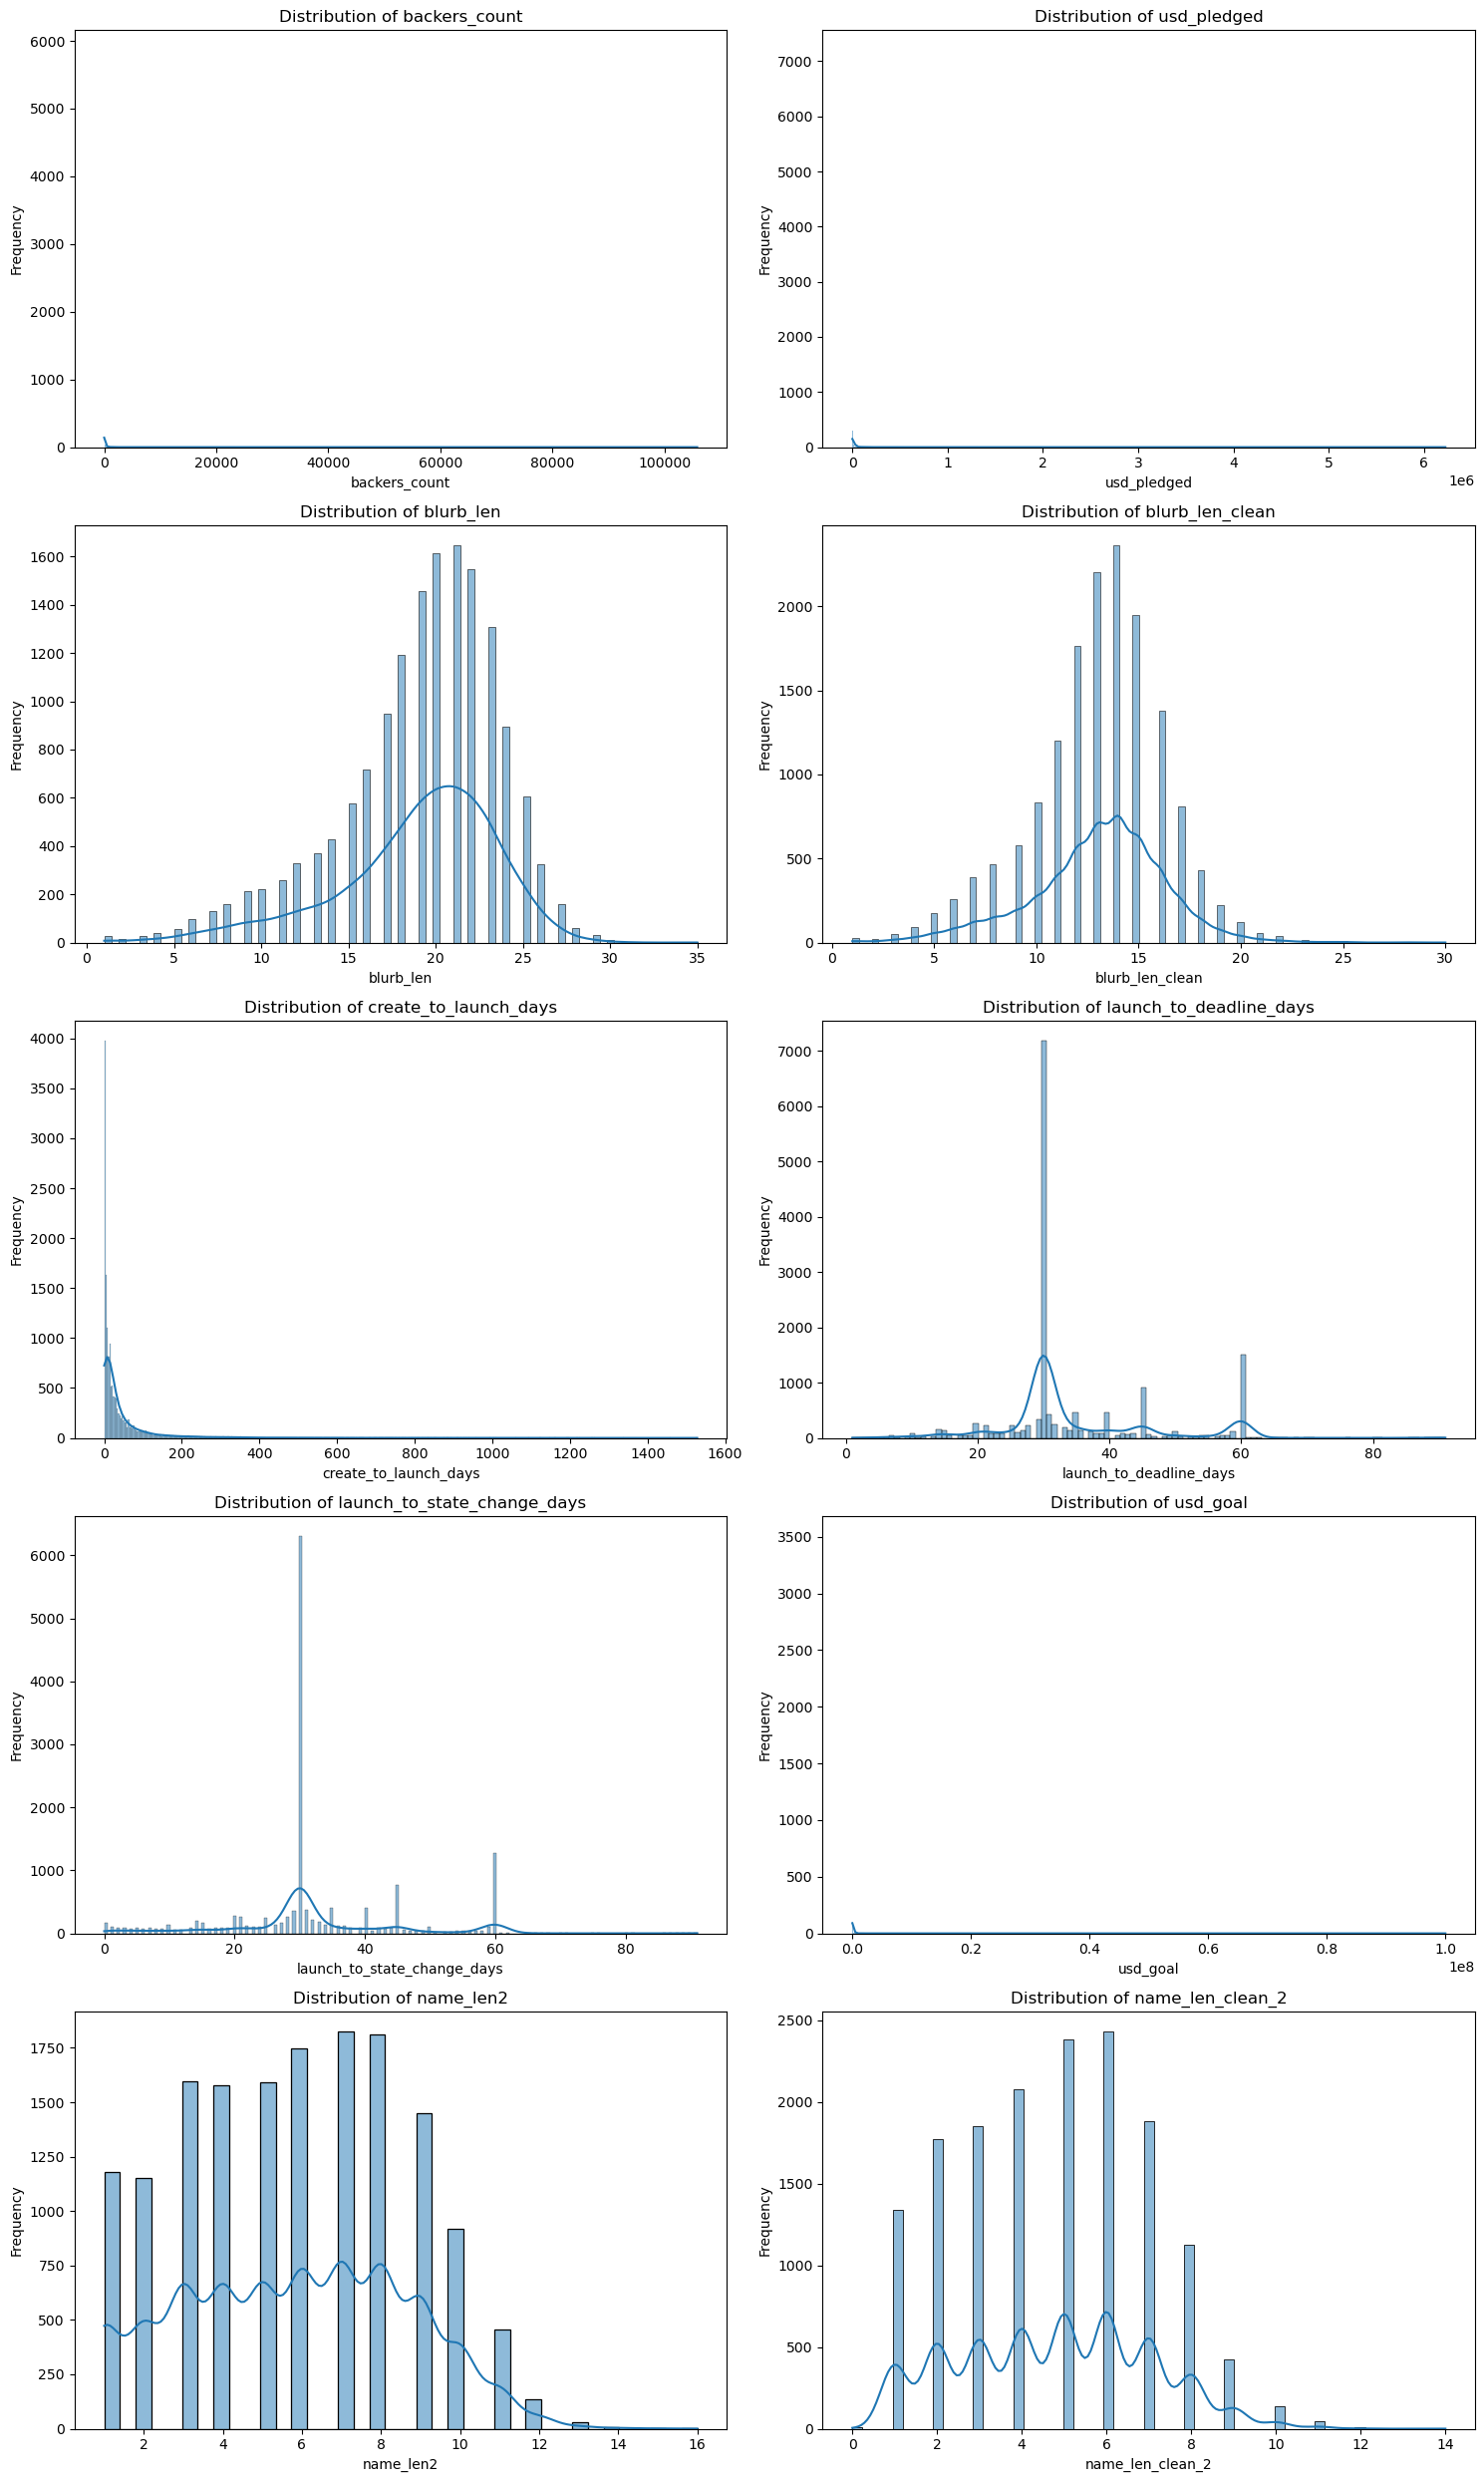

In [22]:
# Set figure layout
n_cols = 2 
n_rows = (len(numcols) + n_cols - 1) // n_cols 

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration if it's multidimensional
axes = axes.flatten() if n_rows > 1 else [axes]

# Plot histograms for each column
for i, col in enumerate(numcols):
    sns.histplot(df[col], kde=True, ax=axes[i]) #kde to visualize probabibility density of data
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [17]:
# trying to make a call on distribution for blurb_len_clean
mean_blurb_len_clean = df['blurb_len_clean'].mean()
median_blurb_len_clean = df['blurb_len_clean'].median()
mode_blurb_len_clean = df['blurb_len_clean'].mode()[0]

mean_blurb_len_clean, median_blurb_len_clean, mode_blurb_len_clean

(13.031286360698125, 13.0, 14.0)

*Observations - First Pass*
* Extremely high right skew in `backers_count`, `usd_pledged`, and `usd_goal` with a slight lift near 0. This warrants another look at the data to identify outliers and the distribution of the data without them. 
* Distribution of blurb_len is skewed left slightly but with stop words removed in blurb_len_clean it becomes a fairly normal distribution (mean ~13, median ~13, mode ~14). 
* Create to launch days has a significant right skew, with most clustering between 0 and 100 days and some staying in that state for years. This may be cases of projects left dormant and later suspended or cancelled. Another place to check for outliers
* Launch to deadline days has a bimodal distribution with the most significant peak around 30 days. And another much smaller one around 60 days. Believe the major peak is consistent with advice on the site to have funding periods of 30 days or less. 
* Launch to status change days is better interpreted when stratified by status.
* name_len and name_len_clean unimaodal and roughly symmetrical around their peaks. 

*On second pass, be more strict about the "so what"*

In [14]:
df['state'].unique()

array(['failed', 'successful', 'canceled', 'suspended'], dtype=object)

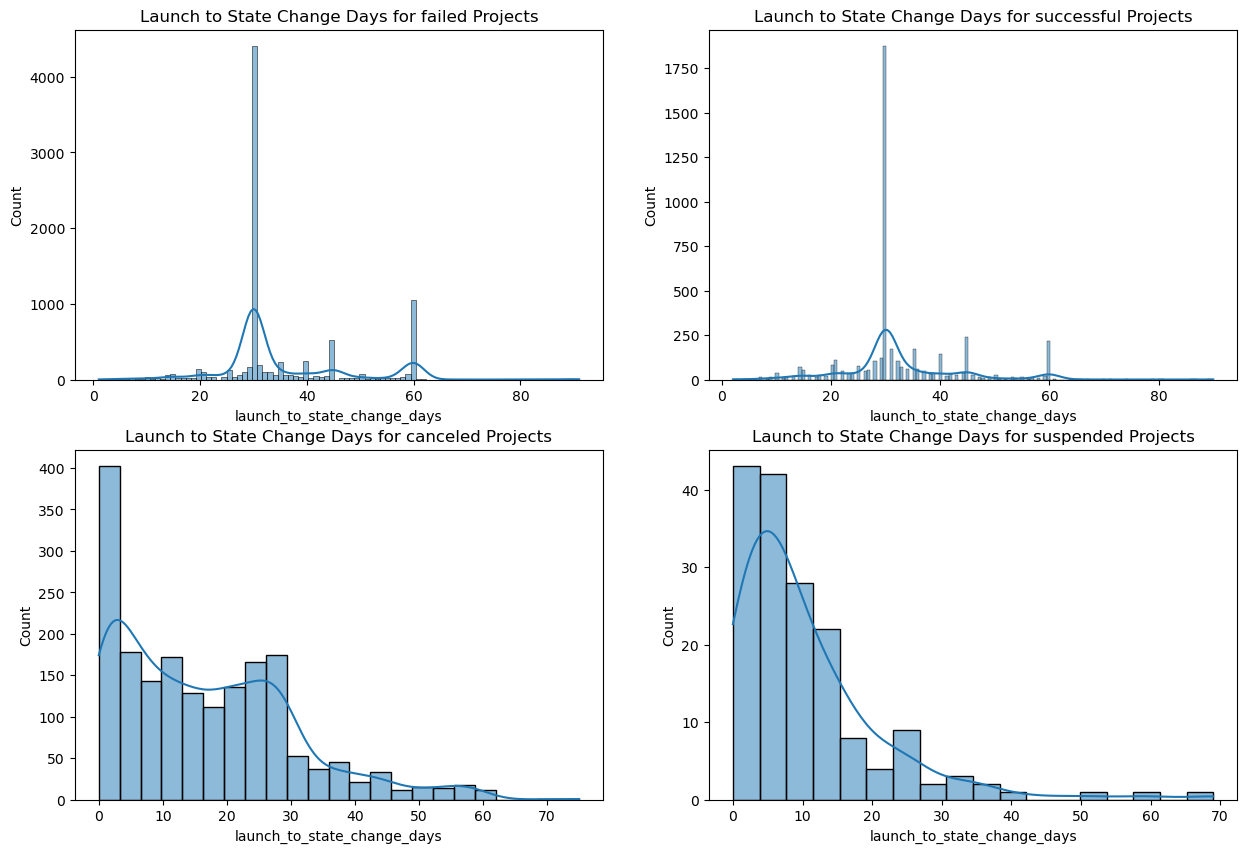

In [16]:
# launch to status change histograms broken out by status 
unique_states = df['state'].unique()
n_cols = 2
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration if it's multidimensional
axes = axes.flatten() if n_rows > 1 else [axes]

# Iterate through each unique state and plot the histogram
for i, state in enumerate(unique_states):
    state_data = df[df['state'] == state]['launch_to_state_change_days']
    
    # Plot the histogram
    sns.histplot(state_data, kde=True, ax=axes[i])
    
    # Set the title for each subplot
    axes[i].set_title(f'Launch to State Change Days for {state} Projects')

* Similar distributions for the number of days it takes for a project to enter status failed or successful. Both multimodal with peaks around the same number of days: 30, 45, and 60. Also similar ranges. This may indicate the typical campaign durations. This can be verified by checking number of days between when projects tend to be launched and their deadline. Plots below validate this hypothesis. Same distribution. The similarity in distribution in days to state change here is from projects coming to a natural close as planned at launch. 
* Days to cancel project is right-skewed with the mode near 0. This may be due to the fact that certain elements of a project cannot be edited after launch for maintaining accountability. Thus, if there's a real error, the user must cancel to make such changes. There's also another peak around 30 days. This may be users cancelling projects if it appears the project will fail **test this later**
* For suspended projects, there is a more signifanct right skew and some gaps in the distribution between ~40 and 70 days. The clusteering between 0 and 10 days shows mechanisms for spotting proejects which do not align with the nature of Kickstarter are working quite well.

In [19]:
pd.set_option('display.max_columns', None)
df.head()

,state,disable_communication,country,staff_pick,backers_count,usd_pledged,category,spotlight,blurb_len,blurb_len_clean,deadline_weekday,state_changed_at_weekday,created_at_weekday,launched_at_weekday,deadline_month,deadline_day,deadline_yr,deadline_hr,state_changed_at_month,state_changed_at_day,state_changed_at_yr,state_changed_at_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,usd_goal,name2,name_len2,name_len_clean_2
0,failed,False,GB,False,66,8484.125686,Gadgets,False,18.0,14.0,Saturday,Saturday,Friday,Thursday,3,19,2016,9,3,19,2016,9,12,18,2015,3,2,18,2016,9,62,30,30,21450,MAGIC PIXEL - Bluetooth full color LED display,8,8
1,successful,False,DE,False,131,18454.471487,Uncategorized,True,23.0,15.0,Sunday,Sunday,Monday,Thursday,4,3,2016,8,4,3,2016,8,2,8,2016,9,2,18,2016,8,9,45,45,10034,SmartPi - Turn your Raspberry Pi into a SmartM...,9,6
2,canceled,False,US,False,632,43234.000000,Gadgets,False,22.0,12.0,Tuesday,Monday,Sunday,Thursday,3,29,2016,8,3,28,2016,9,1,31,2016,5,2,18,2016,8,18,40,39,60000,PlantSitter - The World's Smartest Plant Monit...,8,7
3,canceled,False,US,False,4,1262.000000,Hardware,False,24.0,16.0,Saturday,Tuesday,Thursday,Thursday,3,19,2016,7,2,23,2016,9,1,28,2016,11,2,18,2016,7,20,30,5,125000,Digital Video LUT Box for Colorblindness Corre...,7,6
4,successful,False,US,False,29,2300.000000,Experimental,True,19.0,13.0,Thursday,Thursday,Tuesday,Thursday,3,3,2016,17,3,3,2016,17,2,16,2016,10,2,18,2016,7,1,14,14,2000,help send Object Collection to Norway!,6,5


In [8]:
# Ensuredatetime column
df['launched_at'] = pd.to_datetime(df['launched_at'])
df['deadline'] = pd.to_datetime(df['deadline'])

# Extract only the date part
df['launched_at_date'] = df['launched_at'].dt.date
df['deadline_date'] = df['deadline'].dt.date

# Calculate the planned duration in days
df['planned_duration'] = (df['deadline'] - pd.to_datetime(df['launched_at_date'])).dt.days

In [33]:
df.head()

,id,name,goal,pledged,state,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,static_usd_rate,usd_pledged,category,spotlight,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_weekday,state_changed_at_weekday,created_at_weekday,launched_at_weekday,deadline_month,deadline_day,deadline_yr,deadline_hr,state_changed_at_month,state_changed_at_day,state_changed_at_yr,state_changed_at_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,usd_goal,name2,name_len2,name_len_clean_2,deadline_date,launched_at_date,planned_duration
0,1538064060,MAGIC PIXEL - Bluetooth full color LED display,15000.0,5933.0,failed,False,GB,GBP,2016-03-19,2016-03-19 09:31:32,2015-12-18 03:17:13,2016-02-18 09:31:29,False,66,1.429989,8484.125686,Gadgets,False,8.0,8.0,18.0,14.0,Saturday,Saturday,Friday,Thursday,3,19,2016,9,3,19,2016,9,12,18,2015,3,2,18,2016,9,62,30,30,21450,MAGIC PIXEL - Bluetooth full color LED display,8,8,2016-03-19,2016-02-18,30
1,556771080,SmartPi - Turn your Raspberry Pi into a SmartM...,9000.0,16552.0,successful,False,DE,EUR,2016-04-03,2016-04-03 08:05:10,2016-02-08 09:27:33,2016-02-18 08:05:09,False,131,1.114939,18454.471487,Uncategorized,True,9.0,6.0,23.0,15.0,Sunday,Sunday,Monday,Thursday,4,3,2016,8,4,3,2016,8,2,8,2016,9,2,18,2016,8,9,45,45,10034,SmartPi - Turn your Raspberry Pi into a SmartM...,9,6,2016-04-03,2016-02-18,45
2,839314928,PlantSitter - The World's Smartest Plant Monit...,60000.0,43234.0,canceled,False,US,USD,2016-03-29,2016-03-28 09:46:41,2016-01-31 05:21:52,2016-02-18 08:01:08,False,632,1.000000,43234.000000,Gadgets,False,8.0,8.0,22.0,12.0,Tuesday,Monday,Sunday,Thursday,3,29,2016,8,3,28,2016,9,1,31,2016,5,2,18,2016,8,18,40,39,60000,PlantSitter - The World's Smartest Plant Monit...,8,7,2016-03-29,2016-02-18,40
3,681077916,Digital Video LUT Box for Colorblindness Corre...,125000.0,1262.0,canceled,False,US,USD,2016-03-19,2016-02-23 09:30:28,2016-01-28 11:21:14,2016-02-18 07:48:02,False,4,1.000000,1262.000000,Hardware,False,7.0,6.0,24.0,16.0,Saturday,Tuesday,Thursday,Thursday,3,19,2016,7,2,23,2016,9,1,28,2016,11,2,18,2016,7,20,30,5,125000,Digital Video LUT Box for Colorblindness Corre...,7,6,2016-03-19,2016-02-18,30
4,1315415013,help send Object Collection to Norway!,2000.0,2300.0,successful,False,US,USD,2016-03-03,2016-03-03 17:00:00,2016-02-16 10:00:06,2016-02-18 07:00:44,False,29,1.000000,2300.000000,Experimental,True,6.0,5.0,19.0,13.0,Thursday,Thursday,Tuesday,Thursday,3,3,2016,17,3,3,2016,17,2,16,2016,10,2,18,2016,7,1,14,14,2000,help send Object Collection to Norway!,6,5,2016-03-03,2016-02-18,14


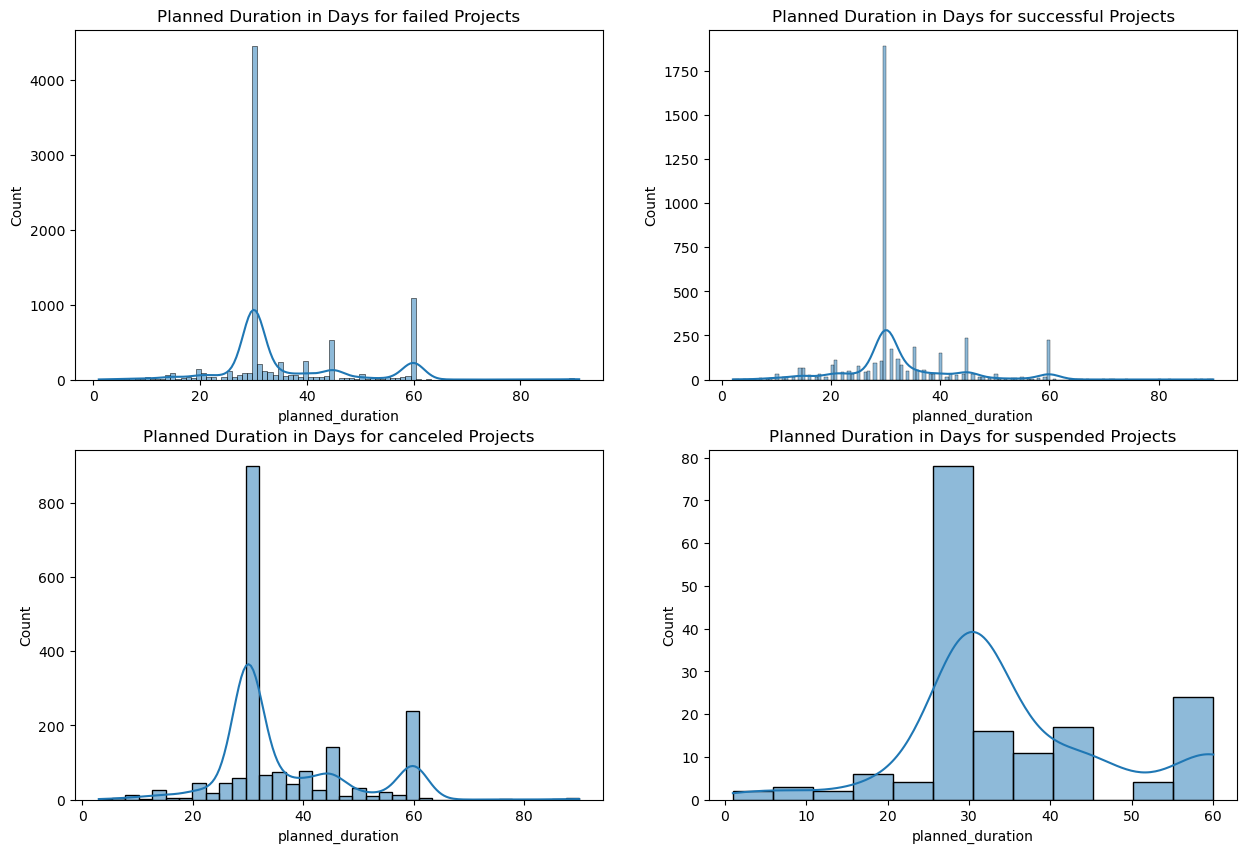

In [34]:

unique_states = df['state'].unique()
n_cols = 2
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration if it's multidimensional
axes = axes.flatten() if n_rows > 1 else [axes]

# Iterate through each unique state and plot the histogram
for i, state in enumerate(unique_states):
    state_data = df[df['state'] == state]['planned_duration']
    
    # Plot the histogram
    sns.histplot(state_data, kde=True, ax=axes[i])
    
    # Set the title for each subplot
    axes[i].set_title(f'Planned Duration in Days for {state} Projects')

* Projects which were cancelled have a similar planned duration to those who went their full length, indicating similar practices being followed across the platform for duration. (confirm if kickstarter has suggested durations. This could validate that this is being largely followed)

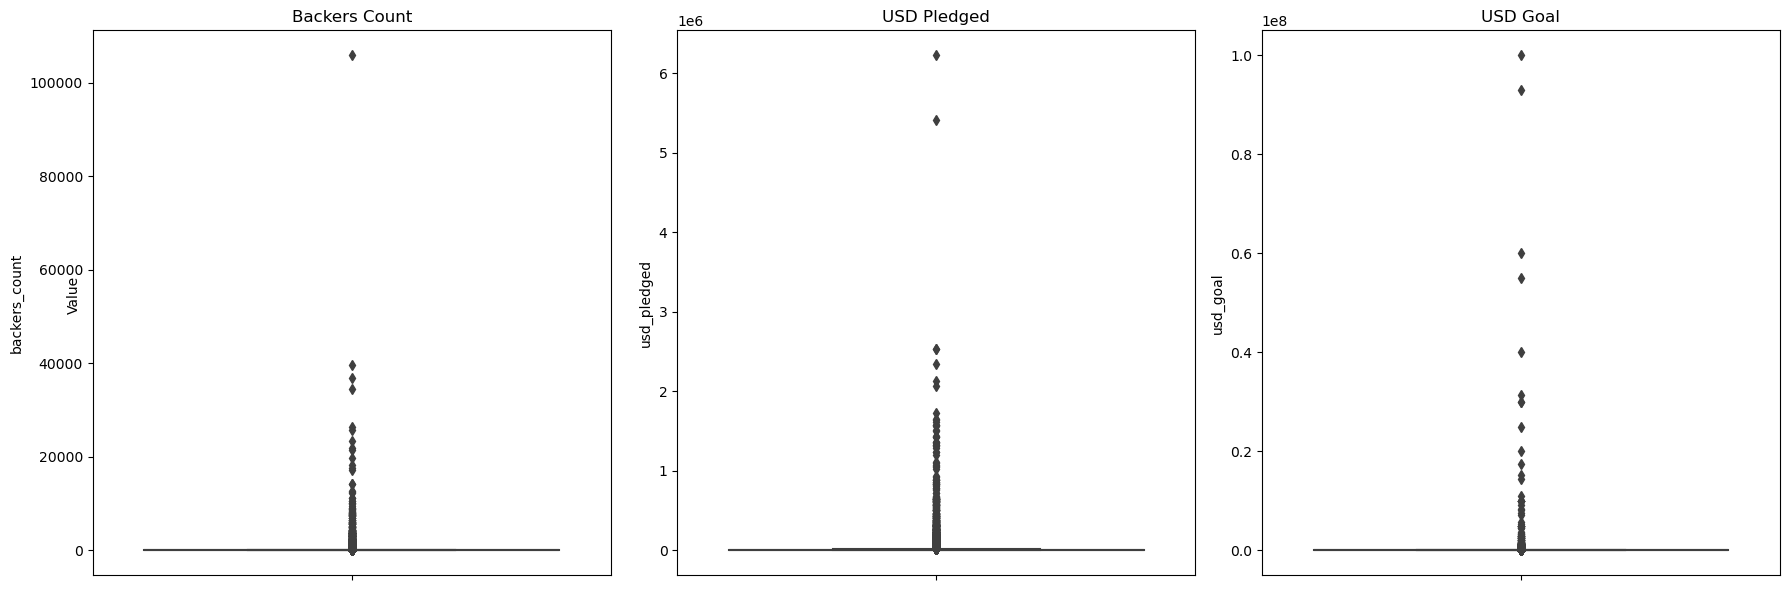

In [16]:
# Creating figure and subplots
n_rows = 1
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(18, 6))

# Plot box plots for each column
sns.boxplot(y=df['backers_count'], ax=ax[0])
ax[0].set_title('Backers Count')

sns.boxplot(y=df['usd_pledged'], ax=ax[1])
ax[1].set_title('USD Pledged')

sns.boxplot(y=df['usd_goal'], ax=ax[2])
ax[2].set_title('USD Goal')

# Set a common y-label
fig.text(0.04, 0.5, 'Value', va='center', rotation='vertical')

plt.tight_layout()
plt.show()

As observed with the histograms, definitely have outliers which make it diffiuclt to interpret much else from the plots. Let's take a closer look at these cases. We'll get the indices of the top 5 of each of these variables.

In [10]:
top_backers_count = df.nlargest(5, 'backers_count')
top_usd_pledged = df.nlargest(5, 'usd_pledged')
top_usd_goal = df.nlargest(5, 'usd_goal')

In [18]:
# Merge the top records to check for overlaps
top_backers_count['source'] = 'backers_count'
top_usd_pledged['source'] = 'usd_pledged'
top_usd_goal['source'] = 'usd_goal'

# Combine all top records into a single DataFrame
combined_top = pd.concat([top_backers_count, top_usd_pledged, top_usd_goal])

In [21]:
combined_top.shape # no duplicates, could probably do a duplicate check step instead

(15, 45)

In [20]:
# Drop duplicate records to see unique top entries
combined_top.drop_duplicates(inplace=True)

In [25]:
combined_top.style
# combined_top.head(15).style

,state,disable_communication,country,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,usd_pledged,category,spotlight,blurb_len,blurb_len_clean,deadline_weekday,state_changed_at_weekday,created_at_weekday,launched_at_weekday,deadline_month,deadline_day,deadline_yr,deadline_hr,state_changed_at_month,state_changed_at_day,state_changed_at_yr,state_changed_at_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,usd_goal,name2,name_len2,name_len_clean_2,launched_at_date,deadline_date,planned_duration,source
12345,successful,False,US,2014-07-02 14:00:00,2014-07-02 14:00:11,2014-04-22 22:00:21,2014-05-28 08:05:45,True,105857,5408916.950000,Web,True,22.000000,17.000000,Wednesday,Wednesday,Tuesday,Wednesday,7,2,2014,14,7,2,2014,14,4,22,2014,22,5,28,2014,8,35,35,35,1000000,"Bring Reading Rainbow Back for Every Child, Everywhere!",8,7,2014-05-28,2014-07-02,35,backers_count
5073,successful,False,US,2015-06-06 10:06:02,2015-06-06 10:06:03,2015-04-16 14:36:44,2015-05-07 10:06:02,True,39560,2071927.560000,Hardware,True,9.000000,6.000000,Saturday,Saturday,Thursday,Thursday,6,6,2015,10,6,6,2015,10,4,16,2015,14,5,7,2015,10,20,30,30,50000,CHIP - The World's First Nine Dollar Computer,8,7,2015-05-07,2015-06-06,30,backers_count
951,successful,False,US,2016-01-23 05:44:12,2016-01-23 05:44:12,2015-10-06 00:18:59,2015-12-09 05:44:12,True,36781,1731465.980000,Hardware,True,21.000000,16.000000,Saturday,Saturday,Tuesday,Wednesday,1,23,2016,5,1,23,2016,5,10,6,2015,0,12,9,2015,5,64,45,45,31416,"PINE A64, First $15 64-Bit Single Board Super Computer",9,9,2015-12-09,2016-01-23,45,backers_count
14534,successful,False,US,2012-11-19 12:58:48,2012-11-19 12:58:48,2012-10-12 14:07:50,2012-10-18 12:58:48,True,34397,2134374.860000,Uncategorized,True,15.000000,11.000000,Monday,Monday,Friday,Thursday,11,19,2012,12,11,19,2012,12,10,12,2012,14,10,18,2012,12,5,32,32,500000,Star Citizen,2,2,2012-10-18,2012-11-19,32,backers_count
14273,successful,False,US,2013-03-24 23:08:59,2013-03-24 23:09:00,2012-08-06 14:02:45,2013-02-18 23:08:59,True,26457,2344134.670000,Hardware,True,27.000000,13.000000,Sunday,Sunday,Monday,Monday,3,24,2013,23,3,24,2013,23,8,6,2012,14,2,18,2013,23,196,34,34,30000,3Doodler: The World's First 3D Printing Pen,7,6,2013-02-18,2013-03-24,34,backers_count
12967,successful,False,US,2014-04-15 12:30:42,2014-04-15 12:30:42,2014-02-25 11:02:08,2014-03-11 12:30:42,True,18220,6225354.980000,Sound,True,15.000000,10.000000,Tuesday,Tuesday,Tuesday,Tuesday,4,15,2014,12,4,15,2014,12,2,25,2014,11,3,11,2014,12,14,35,35,800000,Pono Music - Where Your Soul Rediscovers Music,8,6,2014-03-11,2014-04-15,35,usd_pledged
12345,successful,False,US,2014-07-02 14:00:00,2014-07-02 14:00:11,2014-04-22 22:00:21,2014-05-28 08:05:45,True,105857,5408916.950000,Web,True,22.000000,17.000000,Wednesday,Wednesday,Tuesday,Wednesday,7,2,2014,14,7,2,2014,14,4,22,2014,22,5,28,2014,8,35,35,35,1000000,"Bring Reading Rainbow Back for Every Child, Everywhere!",8,7,2014-05-28,2014-07-02,35,usd_pledged
1496,successful,False,US,2016-01-08 06:57:15,2016-01-08 06:57:15,2015-11-03 19:46:29,2015-11-09 06:57:15,True,10569,2530756.270000,Sound,True,22.000000,14.000000,Friday,Friday,Tuesday,Monday,1,8,2016,6,1,8,2016,6,11,3,2015,19,11,9,2015,6,5,60,60,100000,Revols - Premium Quick Custom-Fit Wireless Earphones,7,7,2015-11-09,2016-01-08,60,usd_pledged
14494,successful,False,GB,2013-01-04 18:00:57,2013-01-04 18:00:57,2012-10-31 11:08:38,2012-11-05 18:00:57,True,25681,2529437.822630,Uncategorized,True,22.000000,16.000000,Friday,Friday,Wednesday,Monday,1,4,2013,18,1,4,2013,18,10,31,2012,11,11,5,2012,18,5,60,60,2003273,Elite: Dangerous,2,2,2012-11-05,2013-01-04,60,usd_pledged
14273,successful,False,US,2013-03-24 23:08:59,2013-03-24 23:09:00,2012-08-06 14:02:45,2013-02-18 23:08:59,True,26457,2344134.670000,Hardware,True,27.000000,13.000000,Sunday

None are in a cancelled or suspended state that could easily disqualify them as valid records. Most are actually Staff Picks & Spotlighted, signalling legitimacy of the projects and an expectation / hope that such projects would be on the platform.
The ones which failed and were not priviledged by Kickstarter are those which were in the top 5 in terms of goals - aspiration - instead of amount pledged or backers - real success. Even then, this doesn't preclude such projects from being considered as part of the kickstarter project portfolio. 

That said, due to the high skew. Median should be considered the measure of central tendency for these

Let's check out the data distribution for these without the outliers

In [28]:
# Define a function to filter out values outside the IQR
def filter_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

In [29]:
# Create dataframes excluding values outside the IQR for each variable
df_backers_count_iqr = filter_iqr(df, 'backers_count')
df_usd_pledged_iqr = filter_iqr(df, 'usd_pledged')
df_usd_goal_iqr = filter_iqr(df, 'usd_goal')

In [35]:
# Percentage of records in the filtered dataframes
print("Percentage of records in backers_count IQR filtered dataframe:", len(df_backers_count_iqr)/df.shape[0])
print("Percentage of records in usd_pledged IQR filtered dataframe:", len(df_usd_pledged_iqr)/df.shape[0])
print("Percentage of records in usd_goal IQR filtered dataframe:", len(df_usd_goal_iqr)/df.shape[0])

Percentage of records in backers_count IQR filtered dataframe: 0.8528499418379216
Percentage  of records in usd_pledged IQR filtered dataframe: 0.8410236525785189
Percentage  of records in usd_goal IQR filtered dataframe: 0.914630993925294


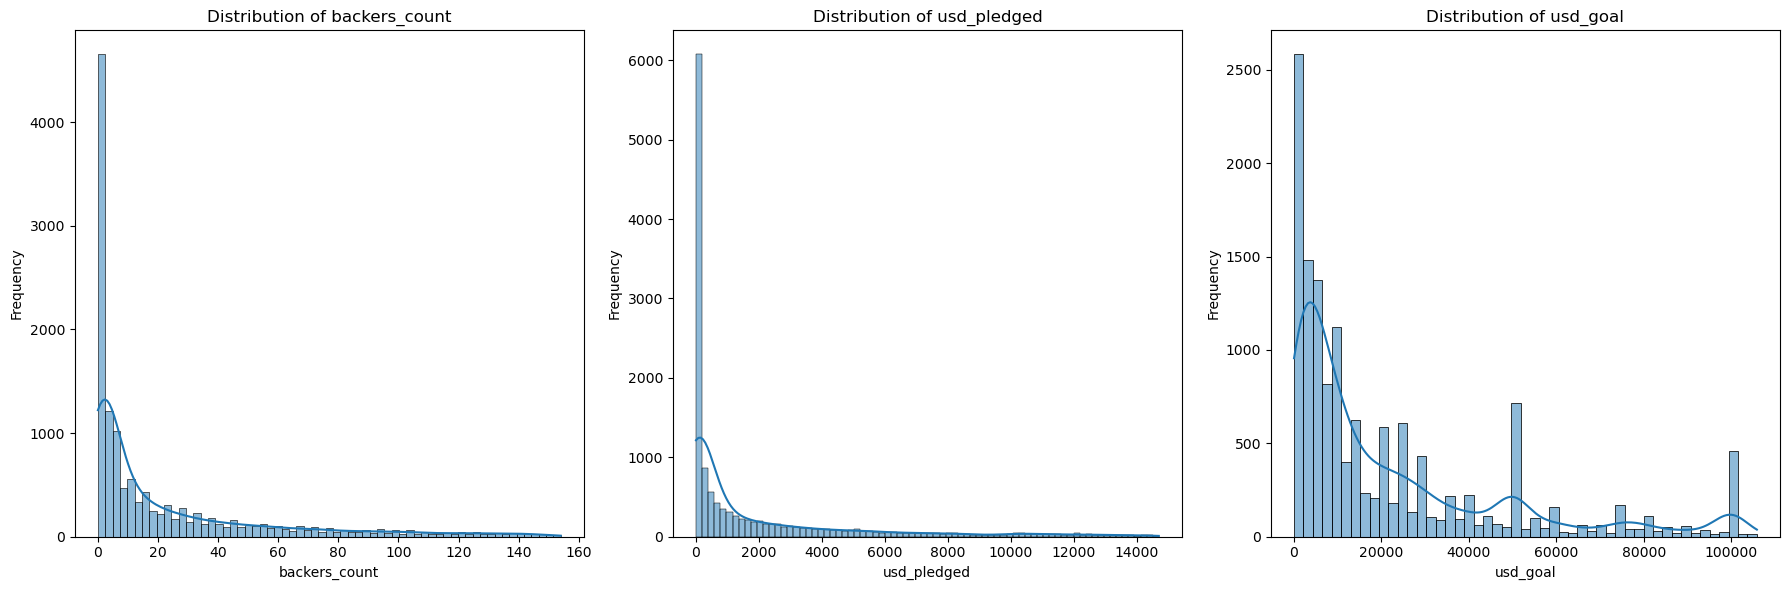

In [37]:
filtered_dfs = [df_backers_count_iqr, df_usd_pledged_iqr, df_usd_goal_iqr]
iqrcols = ['backers_count', 'usd_pledged', 'usd_goal']

# Set figure layout
n_cols = 3 
n_rows = 1

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18,6))

# # Flatten the axes array for easy iteration if it's multidimensional
# axes = axes.flatten() if n_rows > 1 else [axes]

# Ensure axes is an array for iteration
if n_rows * n_cols == 1:
    axes = [axes]
else:
    axes = axes.flatten()
                         
# Plot histograms for each column in the filtered dataframes
for i, (filtered_df, col) in enumerate(zip(filtered_dfs, iqrcols)):
    sns.histplot(filtered_df[col], kde=True, ax=axes[i]) # kde to visualize probability density of data
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

Even when considering the data with extreme values removed via the IQR method, a clear right skew is still observed. This seems to just be the nature of the data distribution of these variables. This pared down view does allow for some patterns to be observed with usd_goal though. Namely that is multimodal. Most projects appear clustered in the 0 to $100,000 range. But another cluseter is around 500,000 and around 1000,000. These may be clean, easily-conceptialized / memorable, aspirational goals to inspire a campaign's community towards. 


In [38]:
# # Calculate the proportion of projects with a usd_goal of 500,000
# goal_500k = (df['usd_goal'] == 500000).sum() / len(df)

# # Calculate the proportion of projects with a usd_goal of 1,000,000
# goal_1000k = (df['usd_goal'] == 1000000).sum() / len(df)

# # Print the results
# print(f"Proportion of projects with a usd_goal of 500,000: {goal_500k:.4f}")
# print(f"Proportion of projects with a usd_goal of 1,000,000: {goal_1000k:.4f}")


Proportion of projects with a usd_goal of 500,000: 0.0037
Proportion of projects with a usd_goal of 1,000,000: 0.0017


In [39]:
# DON'T DELETE THIS UNTIL NEAR THE END
# box plot for `backers_count`, `usd_pledged`, and `usd_goal`. check out outliers. can we dismiss them? or need them?

# then do box plots of the others and see how to treat the outliers --> i think the only scenario i'm dropping an outlier entirely is if it's also a suspended project. so it's probaby in the bivariate analysis that I'll make a call
# re: outliers

**that wraps it for numerical univariate i think**

In [48]:
# Remove 'name2' from the list
if 'name2' in catcols:
    catcols.remove('name2')

print(catcols)

['state', 'disable_communication', 'country', 'staff_pick', 'category', 'spotlight']


In [49]:
# check number of unique values for categorical variables

for col in catcols:
    num_unique_values = df[col].nunique()
    print(f"Number of unique values in {col}: {num_unique_values}")

Number of unique values in state: 4
Number of unique values in disable_communication: 2
Number of unique values in country: 18
Number of unique values in staff_pick: 2
Number of unique values in category: 24
Number of unique values in spotlight: 2


Noting here that country and category are two potentially important variables which have a farily high cardinality. All others have expected numbers of unique values and are not high in cardinality

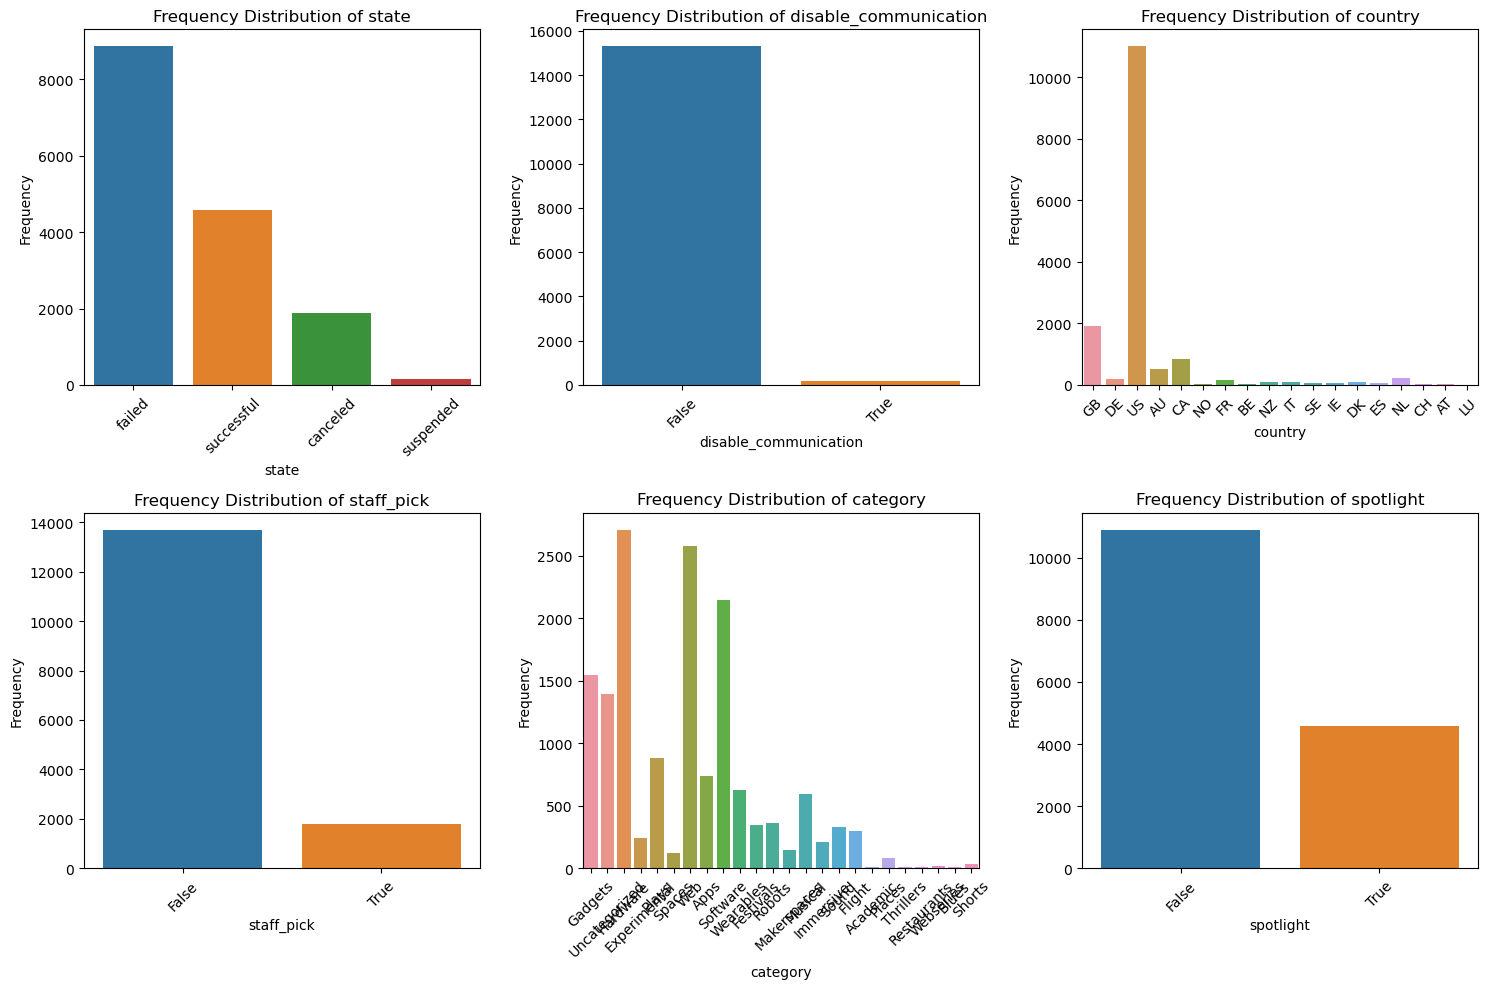

In [50]:
# Set figure layout
n_cols = 3  
n_rows = (len(catcols) + n_cols - 1) // n_cols  # Number of rows in the subplot grid

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration if it's multidimensional
axes = axes.flatten() if n_rows > 1 else [axes]

# Plot frequency distributions for each categorical column
for i, col in enumerate(catcols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Frequency Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)  # Rotate x-axis labels for better readability

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

* About twice as many failed projects as successful, which intuitively feels pretty good / normal but can look for some kind of benchmark to make this claim. Very few having to be suspended, which is good.
* Very few having disabled communication. I'd be interested to see the relationship between disabled comms and being suspended or canceled in the bivariate analysis
* US alone is the source of the bulk of the projects. Intuitively makes snese. Beleive it's an American company, and America also has that entreprenurial spirit I guess. GB is a very far second but substantially more than the other notables countries: Canada, Australia, Netherlands, and Denmark. Perhaps this column would ned up being treated as a binary flag of US vs non-US. 
* Staff-picks for about 15% of the dataset. Makes sense, and may even be high. About 30% of projects are spotlighted. 
* **Category plot not legible. will make anew**

In [ ]:
# do a bigger version of category so it's legible

In [ ]:
# below block taking fore

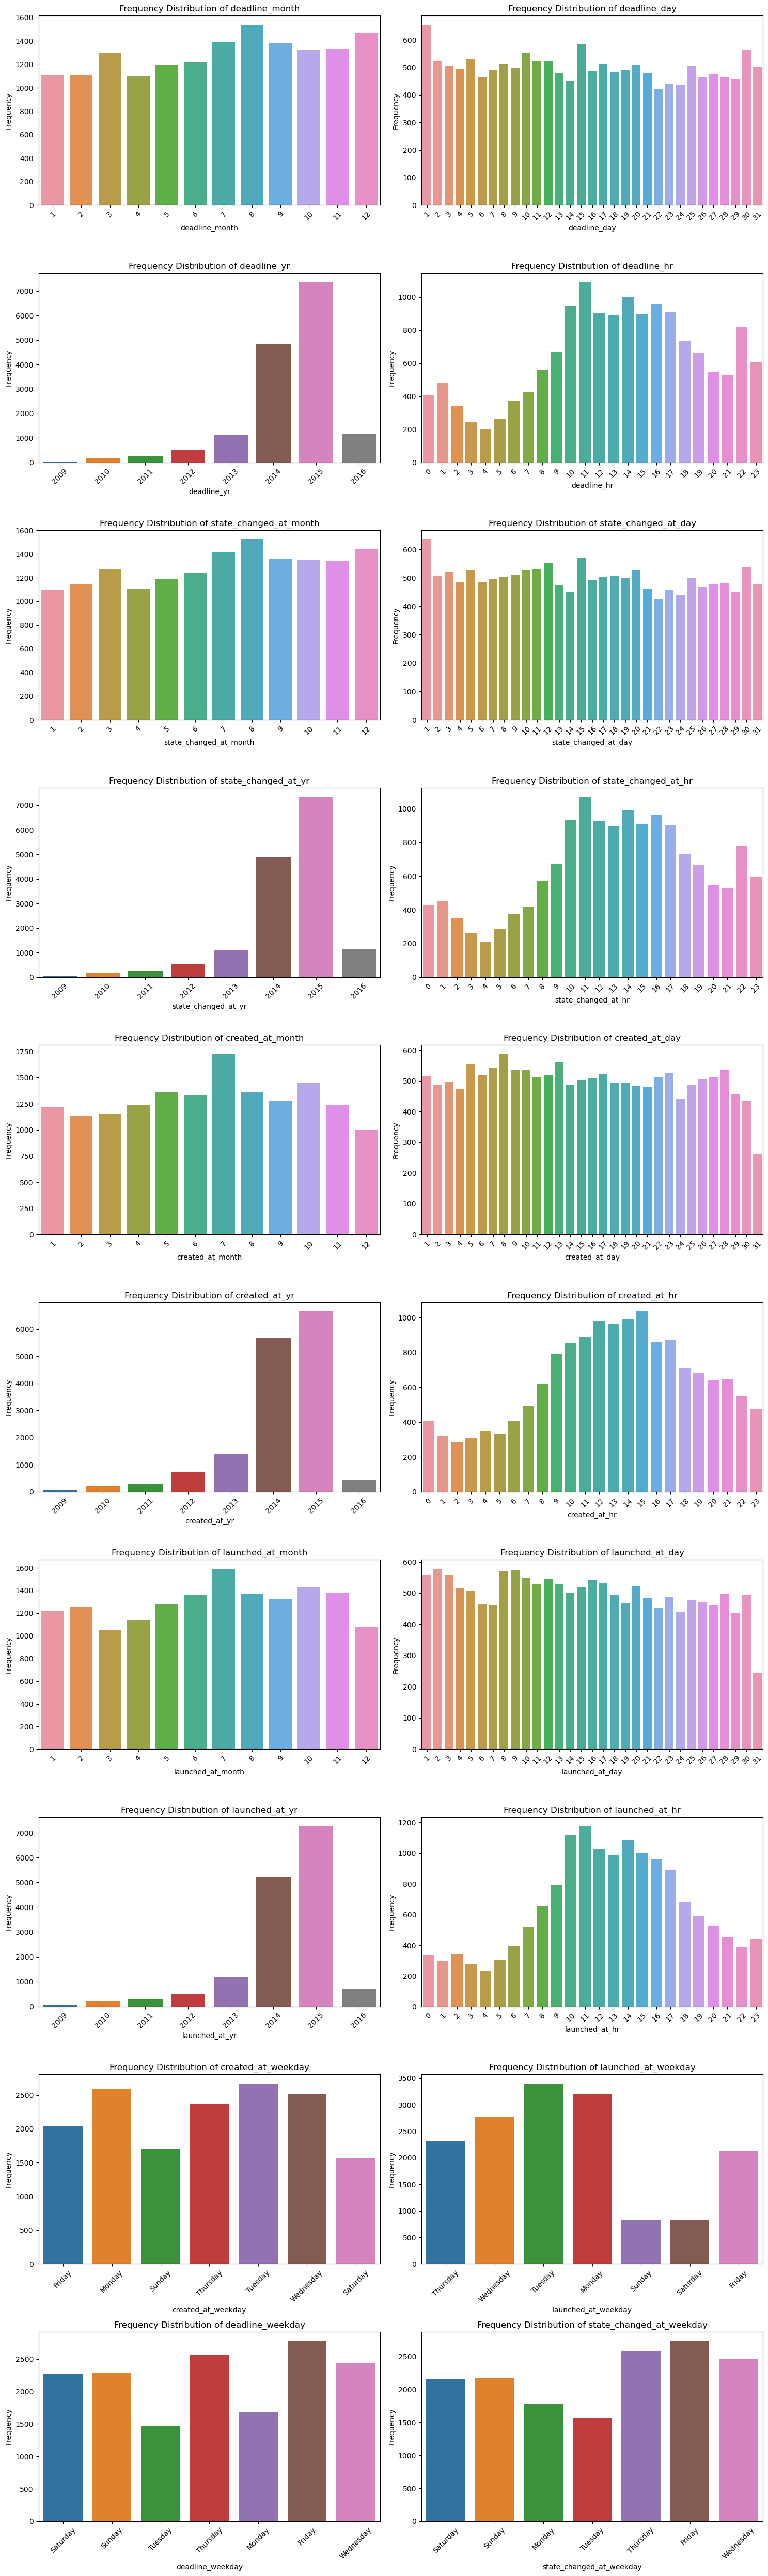

In [56]:
# Set figure layout
n_cols = 2  
n_rows = (len(datetimecols) + n_cols - 1) // n_cols  # Number of rows in the subplot grid

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration if it's multidimensional
axes = axes.flatten() if n_rows > 1 else [axes]

# Plot frequency distributions for each categorical column
for i, col in enumerate(datetimecols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Frequency Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)  # Rotate x-axis labels for better readability

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

* Fairly uniform distributions for day variables. No pattern there. Indication that this may not be useful for the ML model, even if binned into broader portions of a given month.
* 2014 and 2015 most represented for year variables. May just be due to what data got pulled. perhaps we look at clustering just those two years? if any market difference in data distributuisn across years and there's enough data with just those. 
* pretty significanttly higher creation in July. **check that out**, is it one year pushing it up or what? maybe in bivariate. 
* unclear if hours captured are in local timezone. if so, the bulk seems to be around usual hours for when people are up and doing things
* not much interesting about the days of the week except that there is a clear preference to launch on weekdays rather than weekends. maybe people expect less site traffic / attention to be paid on weekends or maybe (if launches typcially aren't automated, they themselves are not on the platform. in either case, low traffic time for at least one major part of the user base - creartors or contributors.)

In [ ]:
# frequency distributions of datetime variables

In [ ]:
# check proportion assigned to each of the top 10 values for the categorical variables

In [57]:
# check nature of categories for sense of how to encode - think this was about that cyclical check thing? leave that to the feature engineering notebook. 

### Bivariate Analysis

Upon validation, the currency for fundraising does not differ in the same country. This means that there is no extra information captured by having both the country and currency variable. However, given the higher cardinality in the `country` compated to `currency`, `currency` may prove to be a helpful proxy variable for geographic factors.

In [65]:
# checking if currency always matches with country
df['cc'] = df['country'] + df['currency']
df['cc'].unique() # currency for fundraising does not differ in the same country. No extra information captured having both the country and currency variable. 

array(['GBGBP', 'DEEUR', 'USUSD', 'AUAUD', 'CACAD', 'NONOK', 'FREUR',
       'BEEUR', 'NZNZD', 'ITEUR', 'SESEK', 'IEEUR', 'DKDKK', 'ESEUR',
       'NLEUR', 'CHCHF', 'ATEUR', 'LUEUR'], dtype=object)

In [ ]:
# vary other veriables with year
# vary other variables with state 

In [ ]:
# create version of dataset with encoded categoricals and normalized numerical, perform 2 component PCA and plot for an initial idea of whether there are clusters present
# make commentary, but don't abandon clustering yet

In [ ]:
# pairplots for all the numerical variables, see if any relationships to observe. 
# especially among variables which seemed to have meaningful divides in the univariate analysis

### Multivariate Analysis

In [ ]:
# correlation martrix for numerical
# chi-square tests for categorical

In [ ]:
# check proportion of each categorical variable value that is in each state (mosaic plot)

In [ ]:
# interesting bivariate plots from earlier color coded by state

### Testing Assumptions
* What states are common in the projects which have a very long creaton to state change duration? are these projects ones that are dormant and are being suspended or cancelled?
* Are users cancelling projects that appear they might fail? Peak in cancellations aroudn 30 days. See if those also have planned duration of 30 days and how much of their goal was acheived by that time
* Any notable difference in observed patterns / conclusions by year? 
* Distribution of goals, categories, of staff pick and of spotlight (seperately) projects. perhaps this fits better with bivariate analysis